In [5]:
# 匯入必要的庫
import pandas as pd
from pycaret.classification import *

# 讀取 Titanic 資料集
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# 資料預處理
# 移除不必要的列（如 'PassengerId', 'Name', 'Ticket', 'Cabin'）
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 處理缺失值
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())  # 用中位數填補
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])  # 用眾數填補

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())  # 用中位數填補
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())  # 用中位數填補
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])  # 用眾數填補

# 編碼分類變數
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 定義目標變數（Target）和特徵（Features）
target = 'Survived'

# 使用 PyCaret 進行模型比較
# 初始化 PyCaret 環境
clf_setup = setup(data=train_data, target=target, session_id=123, verbose=True)

# 比較所有模型
best_model = compare_models()

# 輸出最佳模型
print("最佳模型：", best_model)

# 獲取所有模型的比較結果
models_result = pull()  # 獲取模型比較結果
print(models_result)

# 測試資料的預測（選擇最佳模型進行預測）
final_model = finalize_model(best_model)  # 固化模型
predictions = predict_model(final_model, data=test_data)

# 整合 Kaggle 提交所需的格式
# 讀取原始的測試集資料，確保包含 PassengerId 欄位
test_data_original = pd.read_csv("test.csv")

# 創建 Kaggle 提交格式
submission = pd.DataFrame({
    'PassengerId': test_data_original['PassengerId'],  # 原始的 PassengerId
    'Survived': predictions['prediction_label']       # 預測的 Survived 標籤
})

# 保存為 4-1.csv
submission.to_csv('4-1.csv', index=False)

print("最終結果已保存為 4-1.csv，格式適用於 Kaggle 提交。")


,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8185,0.8444,0.7236,0.7934,0.7531,0.6103,0.6153,0.0750
catboost,CatBoost Classifier,0.8185,0.8565,0.6900,0.8135,0.7418,0.6042,0.6127,0.1840
gbc,Gradient Boosting Classifier,0.8106,0.8430,0.6819,0.7958,0.7316,0.5874,0.5936,0.0110
rf,Random Forest Classifier,0.8009,0.8376,0.7024,0.7677,0.7288,0.5724,0.5777,0.0180
xgboost,Extreme Gradient Boosting,0.7977,0.8294,0.7029,0.7535,0.7238,0.5653,0.5689,0.0060
ada,Ada Boost Classifier,0.7945,0.8394,0.7283,0.7355,0.7289,0.5639,0.5668,0.0090
lr,Logistic Regression,0.7944,0.8555,0.7114,0.7455,0.7231,0.5607,0.5655,0.0040
ridge,Ridge Classifier,0.7896,0.8548,0.6946,0.7418,0.7145,0.5488,0.5519,0.0040
lda,Linear Discriminant Analysis,0.7896,0.8547,0.6946,0.7418,0.7145,0.5488,0.5519,0.0040
qda,Quadratic Discriminant Analysis,0.7864,0.8421,0.7194,0.7242,0.7155,0.5455,0.5519,0.0040


最佳模型： LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8185  0.8444  0.7236  0.7934   
catboost              CatBoost Classifier    0.8185  0.8565  0.6900  0.8135   
gbc          Gradient Boosting Classifier    0.8106  0.8430  0.6819  0.7958   
rf               Random Forest Classifier    0.8009  0.8376  0.7024  0.7677   
xgboost         Extreme Gradient Boosting    0.7977  0.8294  0.7029  0.7535   
ada                  Ada Boost Classifier    0.7945  0.8394  0.7283  0.7355

最終結果已保存為 4-1.csv，格式適用於 Kaggle 提交。


,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8185,0.8444,0.7236,0.7934,0.7531,0.6103,0.6153,0.0760
catboost,CatBoost Classifier,0.8185,0.8565,0.6900,0.8135,0.7418,0.6042,0.6127,0.1760
gbc,Gradient Boosting Classifier,0.8106,0.8430,0.6819,0.7958,0.7316,0.5874,0.5936,0.0110
rf,Random Forest Classifier,0.8009,0.8376,0.7024,0.7677,0.7288,0.5724,0.5777,0.0170
xgboost,Extreme Gradient Boosting,0.7977,0.8294,0.7029,0.7535,0.7238,0.5653,0.5689,0.0060
ada,Ada Boost Classifier,0.7945,0.8394,0.7283,0.7355,0.7289,0.5639,0.5668,0.0090
lr,Logistic Regression,0.7944,0.8555,0.7114,0.7455,0.7231,0.5607,0.5655,0.0040
ridge,Ridge Classifier,0.7896,0.8548,0.6946,0.7418,0.7145,0.5488,0.5519,0.0040
lda,Linear Discriminant Analysis,0.7896,0.8547,0.6946,0.7418,0.7145,0.5488,0.5519,0.0040
qda,Quadratic Discriminant Analysis,0.7864,0.8421,0.7194,0.7242,0.7155,0.5455,0.5519,0.0040


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.8653,0.7708,0.8043,0.7872,0.6591,0.6595
1,0.8080,0.8462,0.6250,0.8333,0.7143,0.5741,0.5876
2,0.7920,0.8151,0.7083,0.7391,0.7234,0.5569,0.5572
3,0.8548,0.8636,0.8298,0.7959,0.8125,0.6942,0.6946
4,0.7742,0.8450,0.7292,0.7000,0.7143,0.5277,0.5280
Mean,0.8138,0.8470,0.7326,0.7745,0.7503,0.6024,0.6054
Std,0.0298,0.0181,0.0679,0.0482,0.0414,0.0634,0.0625


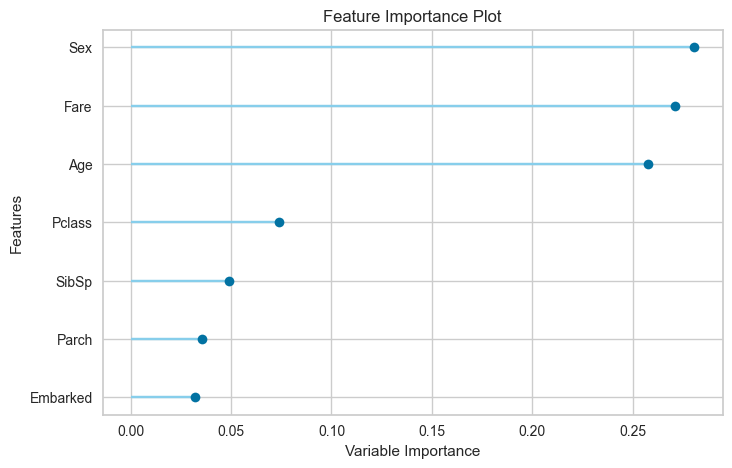

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8339,0.7500,0.7200,0.7347,0.5660,0.5663
1,0.7778,0.7799,0.6250,0.7500,0.6818,0.5132,0.5183
2,0.8730,0.9487,0.8750,0.8077,0.8400,0.7350,0.7366
3,0.7903,0.8673,0.7391,0.7083,0.7234,0.5547,0.5550
4,0.7581,0.8355,0.5417,0.7647,0.6341,0.4612,0.4765
5,0.7742,0.7818,0.7083,0.7083,0.7083,0.5241,0.5241
6,0.8548,0.8980,0.7083,0.8947,0.7907,0.6819,0.6928
7,0.7581,0.8300,0.7500,0.6667,0.7059,0.5016,0.5041
8,0.7258,0.8289,0.5417,0.6842,0.6047,0.3991,0.4055


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8584,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.8571,0.8248,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8095,0.8782,0.5833,0.8750,0.7000,0.5685,0.5936
3,0.8548,0.8729,0.6522,0.9375,0.7692,0.6683,0.6917
4,0.6935,0.6952,0.5000,0.6316,0.5581,0.3284,0.3336
5,0.8226,0.8531,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8871,0.8925,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.7742,0.8015,0.7917,0.6786,0.7308,0.5383,0.5430
8,0.8065,0.8673,0.7083,0.7727,0.7391,0.5857,0.5871


堆疊模型完成： StackingClassifier(cv=5,
                   estimators=[('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                                               re...
                                               sub

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8590,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.7937,0.8082,0.6667,0.7619,0.7111,0.5517,0.5547
2,0.8571,0.9316,0.8333,0.8000,0.8163,0.6995,0.6999
3,0.8387,0.8946,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.7581,0.7961,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.7742,0.7906,0.7083,0.7083,0.7083,0.5241,0.5241
6,0.8710,0.9073,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.7419,0.8196,0.7083,0.6538,0.6800,0.4644,0.4654
8,0.7097,0.8438,0.5000,0.6667,0.5714,0.3586,0.3671


Fitting 10 folds for each of 50 candidates, totalling 500 fits
超參數調優完成


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
最終結果已保存為 4-2.csv，格式適用於 Kaggle 提交。


In [6]:
# 匯入必要的庫
import pandas as pd
from pycaret.classification import *

# 讀取 Titanic 資料集
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# 資料預處理
# 移除不必要的列（如 'PassengerId', 'Name', 'Ticket', 'Cabin'）
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 處理缺失值
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())  # 用中位數填補
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])  # 用眾數填補

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())  # 用中位數填補
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())  # 用中位數填補
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])  # 用眾數填補

# 編碼分類變數
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 定義目標變數（Target）和特徵（Features）
target = 'Survived'

# 使用 PyCaret 初始化環境
clf_setup = setup(data=train_data, target=target, session_id=123, verbose=True)

# 1. 比較模型並選擇最佳模型
best_model = compare_models()

# 2. 特徵工程
# 自動生成交互特徵並測試性能
new_features = create_model('rf', fold=5)
plot_model(new_features, plot='feature')  # 繪製特徵重要性圖

# 3. 模型集成
# 進行堆疊模型
stacked_model = stack_models(estimator_list=[best_model], meta_model=create_model('lr'))
print("堆疊模型完成：", stacked_model)

# 4. 超參數調優
# 對最佳模型進行超參數調優
tuned_model = tune_model(best_model, n_iter=50, optimize='AUC')  # 使用 AUC 作為調優指標
print("超參數調優完成")

# 5. 測試資料的預測（選擇最佳調優後的模型進行預測）
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model, data=test_data)

# 6. 保存結果為 Kaggle 提交格式
test_data_original = pd.read_csv("test.csv")
submission = pd.DataFrame({
    'PassengerId': test_data_original['PassengerId'],  # 原始的 PassengerId
    'Survived': predictions['prediction_label']       # 預測的 Survived 標籤
})
submission.to_csv('4-2.csv', index=False)

print("最終結果已保存為 4-2.csv，格式適用於 Kaggle 提交。")